In [1]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob

In [2]:
# [edge, 1pod_mec, 2pod_mec, 3pod_mec, 4pod_mec, 5pod_mec]
# mean
mean_energy_null_to_warm_disk = []  
mean_energy_null_to_cold = []  
mean_energy_warm_disk_to_warm_cpu = []
mean_energy_warm_cpu_to_warm_disk = []
# std
std_energy_null_to_warm_disk = []
std_energy_null_to_cold = []
std_energy_warm_disk_to_warm_cpu = []
std_energy_warm_cpu_to_warm_disk = []

In [3]:
# null to warm disk - edge
average_energy_null_to_warm_disk_process = []

for i in range(1,10):
    file_name = "../../Measurements/Lifecycle/4G/resource/jetson/warm/arm_pod_1_rep_"+str(i)+"_782023_16h39.csv"
    #PROCESS
    time_power_null_to_warm_disk_process = []
    
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[9] == "cold_to_warm_disk_process":
                time_power_null_to_warm_disk_process.append([float(row[0]),float(row[3])])
                
        # caculate energy null_to_warm_disk_proces
        previos_time = time_power_null_to_warm_disk_process[0][0]
        previos_power = time_power_null_to_warm_disk_process[0][1]
        energy_null_to_warm_disk_process = 0
        for i in range(1, len(time_power_null_to_warm_disk_process)):
            current_energy = (time_power_null_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_null_to_warm_disk_process += current_energy
            previos_time = time_power_null_to_warm_disk_process[i][0]
            previos_power = time_power_null_to_warm_disk_process[i][1]
        average_energy_null_to_warm_disk_process.append(energy_null_to_warm_disk_process)



In [4]:
# edge
average_energy_null_to_cold_process = []
average_energy_warm_disk_to_warm_cpu_process = []
average_energy_warm_cpu_to_warm_disk_process = []
for i in range(1,11):
    file_name = "../../Measurements/Lifecycle/4G/resource/jetson/arm_pod_1_rep_"+str(i)+"_18_7_2023_12h45.csv"
    #PROCESS
    time_power_null_to_cold_process = []
    time_power_warm_disk_to_warm_cpu_process = []
    time_power_warm_cpu_to_warm_disk_process = []
    
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[9] == "null_to_cold_process":
                time_power_null_to_cold_process.append([float(row[0]),float(row[3])])
            elif row[9] == "warm_disk_to_warm_cpu_process":
                time_power_warm_disk_to_warm_cpu_process.append([float(row[0]),float(row[3])])
            elif row[9] == "warm_cpu_to_warm_disk_process":
                time_power_warm_cpu_to_warm_disk_process.append([float(row[0]),float(row[3])])
                
        # caculate energy null_to_cold_proces
        previos_time = time_power_null_to_cold_process[0][0]
        previos_power = time_power_null_to_cold_process[0][1]
        energy_null_to_cold_process = 0
        for i in range(1, len(time_power_null_to_cold_process)):
            current_energy = (time_power_null_to_cold_process[i][0] - previos_time)*previos_power
            energy_null_to_cold_process += current_energy
            previos_time = time_power_null_to_cold_process[i][0]
            previos_power = time_power_null_to_cold_process[i][1]
        average_energy_null_to_cold_process.append(energy_null_to_cold_process)

        # caculate energy warm_disk_to_warm_cpu_process
        previos_time = time_power_warm_disk_to_warm_cpu_process[0][0]
        previos_power = time_power_warm_disk_to_warm_cpu_process[0][1]
        energy_warm_disk_to_warm_cpu_process = 0
        for i in range(1, len(time_power_warm_disk_to_warm_cpu_process)):
            current_energy = (time_power_warm_disk_to_warm_cpu_process[i][0] - previos_time)*previos_power
            energy_warm_disk_to_warm_cpu_process += current_energy
            previos_time = time_power_warm_disk_to_warm_cpu_process[i][0]
            previos_power = time_power_warm_disk_to_warm_cpu_process[i][1]
        average_energy_warm_disk_to_warm_cpu_process.append(energy_warm_disk_to_warm_cpu_process)


        # caculate energy warm_cpu_to_warm_disk_process
        previos_time = time_power_warm_cpu_to_warm_disk_process[0][0]
        previos_power = time_power_warm_cpu_to_warm_disk_process[0][1]
        energy_warm_cpu_to_warm_disk_process = 0
        for i in range(1, len(time_power_warm_cpu_to_warm_disk_process)):
            current_energy = (time_power_warm_cpu_to_warm_disk_process[i][0] - previos_time)*previos_power
            energy_warm_cpu_to_warm_disk_process += current_energy
            previos_time = time_power_warm_cpu_to_warm_disk_process[i][0]
            previos_power = time_power_warm_cpu_to_warm_disk_process[i][1]
        average_energy_warm_cpu_to_warm_disk_process.append(energy_warm_cpu_to_warm_disk_process)

        

In [5]:
# edge
# mean
mean_energy_null_to_warm_disk.append(np.mean(average_energy_null_to_warm_disk_process))
mean_energy_null_to_cold.append(np.mean(average_energy_null_to_cold_process))
mean_energy_warm_disk_to_warm_cpu.append(np.mean(average_energy_warm_disk_to_warm_cpu_process))
mean_energy_warm_cpu_to_warm_disk.append(np.mean(average_energy_warm_cpu_to_warm_disk_process))
# std
std_energy_null_to_warm_disk.append(np.std(average_energy_null_to_warm_disk_process))
std_energy_null_to_cold.append(np.std(average_energy_null_to_cold_process))
std_energy_warm_disk_to_warm_cpu.append(np.std(average_energy_warm_disk_to_warm_cpu_process))
std_energy_warm_cpu_to_warm_disk.append(np.std(average_energy_warm_cpu_to_warm_disk_process))

In [6]:
# mec null to warm disk
average_energy_null_to_warm_disk_process = []
for j in range (1,6):
    for i in range(1,11):
        file_name_list = glob.glob("../../Measurements/Lifecycle/4G/resource/mec/warm/x86_pod_"+str(j)+"_rep_"+str(i)+"_*")
        for file_name in file_name_list:
            energy_null_to_warm_disk_process = []
            
            with open(file_name, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[9] == "cold_to_warm_disk_process":
                        energy_null_to_warm_disk_process.append(float(row[4]))      
                average_energy_null_to_warm_disk_process.append((energy_null_to_warm_disk_process[-1]-energy_null_to_warm_disk_process[0]))
              
    # mean
    mean_energy_null_to_warm_disk.append(np.mean(average_energy_null_to_warm_disk_process)/j)
  
    # std
    std_energy_null_to_warm_disk.append(np.std(average_energy_null_to_warm_disk_process))
 

In [7]:
#mec others
average_energy_null_to_cold_process = []
average_energy_warm_disk_to_warm_cpu_process = []
average_energy_warm_cpu_to_warm_disk_process = []
for j in range (1,6):
    for i in range(1,11):
        file_name_list = glob.glob("../../Measurements/Lifecycle/4G/resource/mec/x86_pod_"+str(j)+"_rep_"+str(i)+"_*")
        for file_name in file_name_list:
            energy_null_to_cold_process = []
            energy_warm_disk_to_warm_cpu_process = []
            energy_warm_cpu_to_warm_disk_process = []
            
            with open(file_name, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[9] == "null_to_cold_process":
                        energy_null_to_cold_process.append(float(row[4]))
                    elif row[9] == "warm_disk_to_warm_cpu_process":
                        energy_warm_disk_to_warm_cpu_process.append(float(row[4]))
                    elif row[9] == "warm_cpu_to_warm_disk_process":
                        energy_warm_cpu_to_warm_disk_process.append(float(row[4]))
                        
                        
                average_energy_null_to_cold_process.append((energy_null_to_cold_process[-1]-energy_null_to_cold_process[0]))
                average_energy_warm_disk_to_warm_cpu_process.append(energy_warm_disk_to_warm_cpu_process[-1]-energy_warm_disk_to_warm_cpu_process[0])
                average_energy_warm_cpu_to_warm_disk_process.append(energy_warm_cpu_to_warm_disk_process[-1]-energy_warm_cpu_to_warm_disk_process[0])
                
    # mean
    mean_energy_null_to_cold.append(np.mean(average_energy_null_to_cold_process)/j)
    mean_energy_warm_disk_to_warm_cpu.append(np.mean(average_energy_warm_disk_to_warm_cpu_process)/j)
    mean_energy_warm_cpu_to_warm_disk.append(np.mean(average_energy_warm_cpu_to_warm_disk_process)/j)
    # std
    std_energy_null_to_cold.append(np.std(average_energy_null_to_cold_process))
    std_energy_warm_disk_to_warm_cpu.append(np.std(average_energy_warm_disk_to_warm_cpu_process))
    std_energy_warm_cpu_to_warm_disk.append(np.std(average_energy_warm_cpu_to_warm_disk_process))


[1037.8029174705027, 6548.400000000001, 3255.3, 2268.4, 1714.3557692307693, 1374.6004897959183]


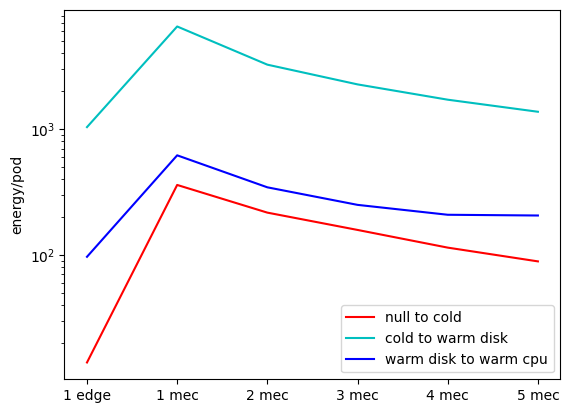

In [8]:
# data
data_null_to_cold = mean_energy_null_to_cold
data_warm_disk_to_warm_cpu = mean_energy_warm_disk_to_warm_cpu
data_warm_cpu_to_warm_disk = mean_energy_warm_cpu_to_warm_disk
data_null_to_warm_disk = mean_energy_null_to_warm_disk
data_cold_to_warm_disk = [x - y - z for x, y, z in zip(data_null_to_warm_disk, data_null_to_cold, data_warm_disk_to_warm_cpu)]
pod = ['1 edge', '1 mec', '2 mec', '3 mec', '4 mec', '5 mec']
print(data_cold_to_warm_disk)

plot.plot(pod, data_null_to_cold, color = 'r', label = 'null to cold' )
plot.plot(pod, data_cold_to_warm_disk, color = 'c', label = 'cold to warm disk' )
# plot.plot(pod, data_warm_cpu_to_warm_disk, color = 'g', label = 'warm cpu to warm disk')
plot.plot(pod, data_warm_disk_to_warm_cpu, color = 'b', label = 'warm disk to warm cpu')

plot.ylabel('energy/pod')
plot.yscale('log', base = 10)
plot.legend()
plot.show()